# NLP Project

In [1]:
from transformers import AutoModel
from transformers import AutoTokenizer, AutoModelForSequenceClassification, RobertaTokenizer, RobertaForSequenceClassification, BertTokenizer, BertForSequenceClassification
import requests 
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Subset
from datasets import load_dataset
import time
import string
import nltk
from torchvision import transforms
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Carlos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carlos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Statistiques descriptives

### 1.1 Statistiques descriptives

In [15]:
# Define a dictionary to map each config to its task type
task_types = {
    'dyda_da': 'DA',
    'dyda_e': 'E',
    'iemocap': 'E',
    'meld_e': 'S',
    'meld_s': 'S',
    'mrda': 'DA',
    'sem': 'S',
    'swda': 'DA'
}

task_types1 = {
    'maptask': 'DA',
    'oasis': 'DA',
}
configs = ['swda','mrda', 'dyda_da']
configs1 = [ 'maptask','oasis']

table = []

response = requests.get("https://datasets-server.huggingface.co/splits?dataset=silicone")
data = response.json()
split_names = [split['split'] for split in data['splits'] if split['dataset'] == 'silicone' and split['config'] == 'dyda_da']


for config in configs:
    
    ## Load the train, validation, and test splits for the current config
    dataset = load_dataset('silicone', config)
    train_dataset, valid_dataset, test_dataset = dataset[split_names[0]], dataset[split_names[1]], dataset[split_names[2]]

    num_utterances = len(dataset['train']['Utterance'])+len(dataset['test']['Utterance'])+len(dataset['validation']['Utterance'])
    num_labels = len(set(dataset['train']['Label']))
    
    train_dataset = train_dataset.unique('Dialogue_ID')
    valid_dataset = valid_dataset.unique('Dialogue_ID')
    test_dataset = test_dataset.unique('Dialogue_ID')
    train_lines = len(train_dataset)
    valid_lines = len(valid_dataset)
    test_lines = len(test_dataset)

    ut_lab = round(num_utterances / num_labels,2)
    
    max_len = 0
    
    # Compute the maximum length of an utterance
    for example in dataset['train']:
        # Get the input text
        input_text = example['Utterance']

        # Tokenize the input text
        tokenized_inputs = tokenizer(input_text, padding=True, truncation=True, return_tensors='pt')

        # Get the input IDs
        input_ids = tokenized_inputs['input_ids']

        # Update the maximum sentence length.
        max_len = max(max_len, len(input_ids[0]))
    
    ## Append the results to the table, including the task type for the current config
    task_type = task_types.get(config, 'N/A')
    table.append([config, task_type, train_lines, valid_lines, test_lines, num_utterances, num_labels, ut_lab, max_len])

for config in configs1:
    ## Load the train, validation, and test splits for the current config
    dataset = load_dataset('silicone', config)
    train_dataset, valid_dataset, test_dataset = dataset[split_names[0]], dataset[split_names[1]], dataset[split_names[2]]

    num_utterances = len(dataset['train']['Utterance'])+len(dataset['test']['Utterance'])+len(dataset['validation']['Utterance'])
    num_labels = len(set(dataset['train']['Label']))
    ut_lab = round(num_utterances / num_labels,2)
    
    train_dataset = train_dataset.unique('Idx')
    valid_dataset = valid_dataset.unique('Idx')
    test_dataset = test_dataset.unique('Idx')
    
    ## Calculate the number of lines, utterances, and labels
    train_lines = len(train_dataset)
    valid_lines = len(valid_dataset)
    test_lines = len(test_dataset)
    
    max_len = 0
    
    # Compute the maximum length of an utterance
    for example in dataset['train']:
        # Get the input text
        input_text = example['Utterance']

        # Tokenize the input text
        tokenized_inputs = tokenizer(input_text, padding=True, truncation=True, return_tensors='pt')

        # Get the input IDs
        input_ids = tokenized_inputs['input_ids']

        # Update the maximum sentence length.
        max_len = max(max_len, len(input_ids[0]))
    
    ## Append the results to the table, including the task type for the current config
    task_type = task_types.get(config, 'N/A')
    table.append([config, task_type, train_lines, valid_lines, test_lines, num_utterances, num_labels, ut_lab, max_len])
           
configs = [ 'dyda_e','meld_s',  'meld_e', 'iemocap','sem']
for config in configs:
    dataset = load_dataset('silicone', config)
    train_dataset, valid_dataset, test_dataset = dataset[split_names[0]], dataset[split_names[1]], dataset[split_names[2]]

    num_utterances = len(dataset['train']['Utterance'])+len(dataset['test']['Utterance'])+len(dataset['validation']['Utterance'])
    num_labels = len(set(dataset['train']['Label']))
    
    train_dataset = train_dataset.unique('Dialogue_ID')
    valid_dataset = valid_dataset.unique('Dialogue_ID')
    test_dataset = test_dataset.unique('Dialogue_ID')
    train_lines = len(train_dataset)
    valid_lines = len(valid_dataset)
    test_lines = len(test_dataset)

    round(num_utterances / num_labels,2)
    
    max_len = 0
    
    # Compute the maximum length of an utterance
    for example in dataset['train']:
        # Get the input text
        input_text = example['Utterance']

        # Tokenize the input text
        tokenized_inputs = tokenizer(input_text, padding=True, truncation=True, return_tensors='pt')

        # Get the input IDs
        input_ids = tokenized_inputs['input_ids']

        # Update the maximum sentence length.
        max_len = max(max_len, len(input_ids[0]))
    
    ## Append the results to the table, including the task type for the current config
    task_type = task_types.get(config, 'N/A')
    table.append([config, task_type, train_lines, valid_lines, test_lines, num_utterances, num_labels, ut_lab, max_len])


# Print the table
print(f"{'Dataset':<10}{'Task':<7}{'Train':8}{'Validation':<13}{'Test':<7}{'Utterances':<13}{'Labels':<9}{'Utt./Labels':<13}{'Max length'}")
for row in table:
    print(f"{row[0]:<10}{row[1]:<7}{row[2]:<8}{row[3]:<13}{row[4]:<7}{row[5]:<13}{row[6]:<9}{row[7]:<13}{row[8]}")

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/swda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/iemocap/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Dataset   Task   Train   Validation   Test   Utterances   Labels   Utt./Labels  Max length
swda      DA     1000    115          11     214626       43       4991.3       113
mrda      DA     56      6            11     109228       5        21845.6      105
dyda_da   DA     11118   1000         1000   102979       4        25744.75     296
maptask   N/A    20905   2963         2894   26762        12       2230.17      122
oasis     N/A    12076   1513         1478   15067        42       358.74       482
dyda_e    E      11118   1000         1000   102979       7        358.74       296
meld_s    S      1038    114          280    13708        3        358.74       97
meld_e    S      1038    114          280    13708        7        358.74       97
iemocap   E      109     11           31     10039        10       358.74       147
sem       S      61      8            10     5627         3        358.74       394


### 1.2 Example tokenisation

In [16]:
# Define the maximum sequence length
max_length = 12

# Define the batch size
batch_size = 64

dataset = load_dataset('silicone', 'dyda_da')

# Print the original text, the sentence split into tokens, and the sentence mapped to token ids
for batch in train_loader:
    # Get the input IDs and the labels
    inputs = batch['Utterance']
    labels = batch['Label']

    # Tokenize the input text
    tokenized_inputs = tokenizer.batch_encode_plus(inputs, max_length=max_length, padding='max_length', truncation=True, return_tensors='pt')

    # Get the input IDs
    input_ids = tokenized_inputs['input_ids']

    # Get the original text, the sentence split into tokens, and the sentence mapped to token ids
    for i in range(1):
        print('Original Text: ', inputs[i])
        print('Tokens: ', tokenizer.convert_ids_to_tokens(input_ids[i]))
        print('Token IDs: ', input_ids[i])

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Original Text:  okay .
Tokens:  ['[CLS]', 'okay', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 3100, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0])
Original Text:  got it .
Tokens:  ['[CLS]', 'got', 'it', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 2288, 2009, 1012,  102,    0,    0,    0,    0,    0,    0,    0])
Original Text:  two two .
Tokens:  ['[CLS]', 'two', 'two', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 2048, 2048, 1012,  102,    0,    0,    0,    0,    0,    0,    0])
Original Text:  and that is exactly what would happen if we ask it to produce an utterance .
Tokens:  ['[CLS]', 'and', 'that', 'is', 'exactly', 'what', 'would', 'happen', 'if', 'we', 'ask', '[SEP]']
Token IDs:  tensor([ 101, 1998, 2008, 2003, 3599, 2054, 2052, 4148, 2065, 2057, 3198,  102])
Original Text:  yeah ye

Original Text:  so we have to get to whoever is doing the - u- - ultimately ==
Tokens:  ['[CLS]', 'so', 'we', 'have', 'to', 'get', 'to', 'whoever', 'is', 'doing', 'the', '[SEP]']
Token IDs:  tensor([ 101, 2061, 2057, 2031, 2000, 2131, 2000, 9444, 2003, 2725, 1996,  102])
Original Text:  but well this is my first guess .
Tokens:  ['[CLS]', 'but', 'well', 'this', 'is', 'my', 'first', 'guess', '.', '[SEP]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 2021, 2092, 2023, 2003, 2026, 2034, 3984, 1012,  102,    0,    0])
Original Text:  us .
Tokens:  ['[CLS]', 'us', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 2149, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0])
Original Text:  yeah yeah | it - it ==
Tokens:  ['[CLS]', 'yeah', 'yeah', '|', 'it', '-', 'it', '=', '=', '[SEP]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 3398, 3398, 1064, 2009, 1011, 2009, 1027, 1027,  102,    0,    0])
Original Text:  and um - add s

Original Text:  that is tourists in heidelberg .
Tokens:  ['[CLS]', 'that', 'is', 'tourists', 'in', 'heidelberg', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([  101,  2008,  2003,  9045,  1999, 16793,  1012,   102,     0,     0,
            0,     0])
Original Text:  or what to write about .
Tokens:  ['[CLS]', 'or', 'what', 'to', 'write', 'about', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([ 101, 2030, 2054, 2000, 4339, 2055, 1012,  102,    0,    0,    0,    0])
Original Text:  what he was saying is the m. three l. does not have any of that .
Tokens:  ['[CLS]', 'what', 'he', 'was', 'saying', 'is', 'the', 'm', '.', 'three', 'l', '[SEP]']
Token IDs:  tensor([ 101, 2054, 2002, 2001, 3038, 2003, 1996, 1049, 1012, 2093, 1048,  102])
Original Text:  they're just not context free trees .
Tokens:  ['[CLS]', 'they', "'", 're', 'just', 'not', 'context', 'free', 'trees', '.', '[SEP]', '[PAD]']
Token IDs:  tensor([ 101, 2027, 1005, 2128, 2074, 202

Original Text:  oh it's surprising .
Tokens:  ['[CLS]', 'oh', 'it', "'", 's', 'surprising', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Token IDs:  tensor([  101,  2821,  2009,  1005,  1055, 11341,  1012,   102,     0,     0,
            0,     0])
Original Text:  and if - if there's something that really requires a lot more than that then it does .
Tokens:  ['[CLS]', 'and', 'if', '-', 'if', 'there', "'", 's', 'something', 'that', 'really', '[SEP]']
Token IDs:  tensor([ 101, 1998, 2065, 1011, 2065, 2045, 1005, 1055, 2242, 2008, 2428,  102])
Original Text:  um | so in some ways in the other sort of parallel set of mo- - more linguistic meetings we've been talking about possible semantics of some construction .
Tokens:  ['[CLS]', 'um', '|', 'so', 'in', 'some', 'ways', 'in', 'the', 'other', 'sort', '[SEP]']
Token IDs:  tensor([ 101, 8529, 1064, 2061, 1999, 2070, 3971, 1999, 1996, 2060, 4066,  102])
Original Text:  her | nope .
Tokens:  ['[CLS]', 'her', '|', 'nope', '.', '[SEP]', '[P

### Comparaison du nombre de parametres

In [8]:
model_ids = ["prajjwal1/bert-tiny", "prajjwal1/bert-mini", "prajjwal1/bert-small", "prajjwal1/bert-medium"]


for model_id in model_ids:
    # Load the model from its ID
    model = AutoModel.from_pretrained(model_id)

    # Get all of the model's parameters as a list of tuples.
    params = list(model.named_parameters())

    print('The', model_id, 'model has {:} different named parameters.\n'.format(len(params)))

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The prajjwal1/bert-tiny model has 39 different named parameters.



Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The prajjwal1/bert-mini model has 71 different named parameters.



Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The prajjwal1/bert-small model has 71 different named parameters.



Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The prajjwal1/bert-medium model has 135 different named parameters.



## 2. Modelisation

In [4]:
def preprocess_text(utterance, prev_utterance=None, next_utterance=None):
    # Lowercase
    text = utterance.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Stemming
    words = [stemmer.stem(w) for w in words]
    return ' '.join(words)

In [15]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [16]:
configs = ['dyda_da', 'dyda_e', 'maptask', 'meld_e', 'meld_s', 'mrda', 'oasis', 'sem']

model_ids = ["prajjwal1/bert-tiny", "prajjwal1/bert-mini", "prajjwal1/bert-small", "prajjwal1/bert-medium"]


# Define hyperparameters
learning_rate = 0.0001
num_epochs = 2
batch_size = 64

for model_id in model_ids:
     
    print(f"* {model_id} *")
    
    for config in configs:
        # Load the SILICONE dataset
        dataset = load_dataset('silicone', config)

        train_subset_size = int(len(dataset['train']) * 0.1)
        train_subset_indices = list(range(train_subset_size))
        train_subset = Subset(dataset['train'], train_subset_indices)
        train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=False)

        valid_subset_size = int(len(dataset['validation']) * 0.1)
        valid_subset_indices = list(range(valid_subset_size))
        valid_subset = Subset(dataset['validation'], valid_subset_indices)
        valid_loader = valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=batch_size, shuffle=False)
        
        test_subset_size = int(len(dataset['test']) * 0.1)
        test_subset_indices = list(range(test_subset_size))
        test_subset = Subset(dataset['test'], test_subset_indices)
        test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=False)


        # Get the number of unique labels in the dataset
        num_labels = len(set(dataset['train']['Label']))

        #model
        tokenizer = AutoTokenizer.from_pretrained(model_id)
        model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=num_labels)
        
        #Add dropout regularization
        dropout_prob = 0.2
        model.classifier.dropout = nn.Dropout(dropout_prob)
    
        # Move model to device
        model.to(device)
    
        # Define optimizer and loss function
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
        scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
        loss_fn = nn.CrossEntropyLoss()

        # Train the model
        for epoch in range(num_epochs):
            # Set model to training mode
            model.train()

            # Train loop
            train_loss = 0.0
            start_time = time.time()

            for step, batch in enumerate(train_loader):
                # Tokenize input sequences
                inputs = [preprocess_text(utterance) for utterance in batch['Utterance']]
                # Tokenize input sequences
                inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors='pt')
                labels = batch['Label']

                # Create attention mask
                input_ids = inputs['input_ids']
                attention_mask = torch.where(input_ids != tokenizer.pad_token_id, 1, 0)

                # Add attention mask to inputs
                inputs['attention_mask'] = attention_mask

                # Forward pass
                outputs = model(**inputs)
                loss = loss_fn(outputs.logits, labels)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_loss += loss.item()

            # Calculate average train loss and time
            avg_train_loss = train_loss / len(train_loader)
            end_time = time.time()
            epoch_time = end_time - start_time

            # Adjust learning rate
            scheduler.step()

            # Set model to evaluation mode
            model.eval()

            # Compute validation accuracy
            valid_preds = []
            valid_labels = []

            with torch.no_grad():
                for batch in valid_loader:
                    # Tokenize input sequences
                    inputs = tokenizer(batch['Utterance'], padding=True, truncation=True, return_tensors='pt')
                    labels = batch['Label']

                    # Make predictions
                    outputs = model(**inputs)
                    preds = F.softmax(outputs.logits, dim=1).argmax(dim=1).tolist()

                    valid_preds.extend(preds)
                    valid_labels.extend(labels.tolist())

            valid_acc = accuracy_score(valid_labels, valid_preds)
 
            # Compute test accuracy
            test_preds = []
            test_labels = []
    
            with torch.no_grad():
                for batch in test_loader:
                    # Tokenize input sequences
                    inputs = tokenizer(batch['Utterance'], padding=True, truncation=True, return_tensors='pt')
                    labels = batch['Label']
    
                    # Make predictions
                    outputs = model(**inputs)
                    preds = F.softmax(outputs.logits, dim=1).argmax(dim=1).tolist()
    
                    test_preds.extend(preds)
                    test_labels.extend(labels.tolist())
    
            test_acc = accuracy_score(test_labels, test_preds)
    
            print(f"Epoch {epoch+1}: train loss = {avg_train_loss:.4f}, validation accuracy for {config} = {valid_acc:.4f}, test accuracy for {config} = {test_acc:.4f}, time = {epoch_time:.2f} s")

* prajjwal1/bert-tiny *


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0858, validation accuracy for dyda_da = 0.3821, test accuracy for dyda_da = 0.3643, time = 15.76 s
Epoch 2: train loss = 1.0224, validation accuracy for dyda_da = 0.3945, test accuracy for dyda_da = 0.3695, time = 14.37 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0652, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 15.62 s
Epoch 2: train loss = 0.8135, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 15.44 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 2.4143, validation accuracy for maptask = 0.2905, test accuracy for maptask = 0.3114, time = 2.64 s
Epoch 2: train loss = 2.3011, validation accuracy for maptask = 0.3142, test accuracy for maptask = 0.3149, time = 2.62 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.8164, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 1.31 s
Epoch 2: train loss = 1.7095, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 1.37 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0609, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 1.25 s
Epoch 2: train loss = 1.0512, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 1.25 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.1312, validation accuracy for mrda = 0.5953, test accuracy for mrda = 0.6509, time = 11.42 s
Epoch 2: train loss = 0.9274, validation accuracy for mrda = 0.6157, test accuracy for mrda = 0.6335, time = 11.32 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 3.5540, validation accuracy for oasis = 0.2781, test accuracy for oasis = 0.2721, time = 2.77 s
Epoch 2: train loss = 3.4021, validation accuracy for oasis = 0.2781, test accuracy for oasis = 0.2721, time = 2.69 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0942, validation accuracy for sem = 0.4583, test accuracy for sem = 0.4483, time = 1.12 s
Epoch 2: train loss = 1.0547, validation accuracy for sem = 0.4792, test accuracy for sem = 0.4828, time = 1.13 s
* prajjwal1/bert-mini *


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0307, validation accuracy for dyda_da = 0.4950, test accuracy for dyda_da = 0.4703, time = 46.13 s
Epoch 2: train loss = 0.9124, validation accuracy for dyda_da = 0.5074, test accuracy for dyda_da = 0.4910, time = 45.91 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 0.8700, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 45.78 s
Epoch 2: train loss = 0.7097, validation accuracy for dyda_e = 0.8896, test accuracy for dyda_e = 0.8695, time = 46.33 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 2.2206, validation accuracy for maptask = 0.3041, test accuracy for maptask = 0.3668, time = 8.11 s
Epoch 2: train loss = 1.9924, validation accuracy for maptask = 0.3074, test accuracy for maptask = 0.3702, time = 7.80 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.6627, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 4.09 s
Epoch 2: train loss = 1.5247, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 3.98 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0617, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 4.05 s
Epoch 2: train loss = 1.0408, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 3.79 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 0.9790, validation accuracy for mrda = 0.5413, test accuracy for mrda = 0.6303, time = 35.45 s
Epoch 2: train loss = 0.7868, validation accuracy for mrda = 0.6055, test accuracy for mrda = 0.6244, time = 35.22 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 3.3534, validation accuracy for oasis = 0.3709, test accuracy for oasis = 0.3741, time = 9.72 s
Epoch 2: train loss = 3.0138, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3741, time = 9.93 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0277, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 4.32 s
Epoch 2: train loss = 0.9763, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 4.19 s
* prajjwal1/bert-small *


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 0.9623, validation accuracy for dyda_da = 0.5459, test accuracy for dyda_da = 0.5401, time = 109.44 s
Epoch 2: train loss = 0.8029, validation accuracy for dyda_da = 0.6067, test accuracy for dyda_da = 0.6034, time = 109.71 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 0.7857, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8695, time = 109.91 s
Epoch 2: train loss = 0.6520, validation accuracy for dyda_e = 0.8747, test accuracy for dyda_e = 0.8643, time = 112.75 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.9223, validation accuracy for maptask = 0.3514, test accuracy for maptask = 0.4083, time = 19.74 s
Epoch 2: train loss = 1.5632, validation accuracy for maptask = 0.4054, test accuracy for maptask = 0.4706, time = 20.13 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.5793, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 9.25 s
Epoch 2: train loss = 1.4915, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 9.13 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.0675, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 8.88 s
Epoch 2: train loss = 1.0295, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 9.13 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 0.8652, validation accuracy for mrda = 0.6014, test accuracy for mrda = 0.6147, time = 85.35 s
Epoch 2: train loss = 0.7233, validation accuracy for mrda = 0.6035, test accuracy for mrda = 0.6096, time = 86.32 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 2.8924, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3810, time = 24.64 s
Epoch 2: train loss = 2.3697, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3810, time = 24.31 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.0429, validation accuracy for sem = 0.6042, test accuracy for sem = 0.4598, time = 10.56 s
Epoch 2: train loss = 0.9218, validation accuracy for sem = 0.6042, test accuracy for sem = 0.4253, time = 10.19 s
* prajjwal1/bert-medium *


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 0.9853, validation accuracy for dyda_da = 0.5360, test accuracy for dyda_da = 0.5129, time = 204.74 s
Epoch 2: train loss = 0.8230, validation accuracy for dyda_da = 0.6104, test accuracy for dyda_da = 0.6202, time = 207.59 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 0.7808, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 203.78 s
Epoch 2: train loss = 0.6549, validation accuracy for dyda_e = 0.8648, test accuracy for dyda_e = 0.8217, time = 206.60 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.8942, validation accuracy for maptask = 0.3649, test accuracy for maptask = 0.4429, time = 33.94 s
Epoch 2: train loss = 1.5543, validation accuracy for maptask = 0.3919, test accuracy for maptask = 0.4948, time = 33.66 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.5802, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 16.05 s
Epoch 2: train loss = 1.4781, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 16.65 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.0655, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 16.27 s
Epoch 2: train loss = 1.0558, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 16.23 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 0.8944, validation accuracy for mrda = 0.5810, test accuracy for mrda = 0.6018, time = 153.46 s
Epoch 2: train loss = 0.7196, validation accuracy for mrda = 0.5872, test accuracy for mrda = 0.5527, time = 153.87 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 2.8601, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3741, time = 44.95 s
Epoch 2: train loss = 2.3180, validation accuracy for oasis = 0.3907, test accuracy for oasis = 0.3810, time = 45.86 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.0380, validation accuracy for sem = 0.6458, test accuracy for sem = 0.4598, time = 19.35 s
Epoch 2: train loss = 0.9000, validation accuracy for sem = 0.6458, test accuracy for sem = 0.4598, time = 20.02 s


In [5]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters
num_epochs = 2
batch_size = 64
learning_rate = 1e-4

model_ids = ["prajjwal1/bert-tiny", "prajjwal1/bert-mini", "prajjwal1/bert-small", "prajjwal1/bert-medium"]
configs = ['dyda_da', 'dyda_e', 'maptask', 'meld_e', 'meld_s', 'mrda', 'oasis', 'sem']

for model_id in model_ids:

    for config in configs:
        # Load the SILICONE dataset
        dataset = load_dataset('silicone', config)

        # Take only 10% of the data
        train_subset_size = int(len(dataset['train']) * 0.1)
        train_subset_indices = list(range(train_subset_size))
        train_subset = Subset(dataset['train'], train_subset_indices)
        valid_subset_size = int(len(dataset['validation']) * 0.1)
        valid_subset_indices = list(range(valid_subset_size))
        valid_subset = Subset(dataset['validation'], valid_subset_indices)
        test_subset_size = int(len(dataset['test']) * 0.1)
        test_subset_indices = list(range(test_subset_size))
        test_subset = Subset(dataset['test'], test_subset_indices)

        train_loader = torch.utils.data.DataLoader(train_subset, batch_size=batch_size, shuffle=True)

        valid_loader = torch.utils.data.DataLoader(valid_subset, batch_size=batch_size, shuffle=False)
        
        test_loader = torch.utils.data.DataLoader(test_subset, batch_size=batch_size, shuffle=True)
        
        print("Training subset size:", train_subset_size)
        print("Validation subset size:", valid_subset_size)
        print("Training dataloader length:", len(train_loader))
        print("Validation dataloader length:", len(valid_loader))
        print("test subset size:", test_subset_size)
        print("test dataloader length:", len(test_loader))



        # Get the number of unique labels in the dataset
        num_labels = len(set(dataset['train']['Label']))

        # Define tokenizer and model
        tokenizer = AutoTokenizer.from_pretrained(model_id)
        model = AutoModelForSequenceClassification.from_pretrained(model_id, num_labels=num_labels)
        
            # Define a custom MLP decoder
        mlp_decoder = nn.Sequential(
            nn.Linear(in_features=model.config.hidden_size, out_features=256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=num_labels)
        )

        # Replace the linear layer of the pre-trained BERT model with the custom MLP decoder
        model.classifier = mlp_decoder

        # Move model to device
        model.to(device)

        # Define optimizer and loss function
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
        scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
        loss_fn = nn.CrossEntropyLoss()

        # Train the model
        for epoch in range(num_epochs):
            # Set model to training mode
            model.train()

            # Train loop
            train_loss = 0.0
            start_time = time.time()

            # Loop over batches
            for step, batch in enumerate(train_loader):
                # Tokenize input sequences
                inputs = [preprocess_text(utterance) for utterance in batch['Utterance']]
                inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors='pt').to(device)
                labels = batch['Label'].to(device)

                # Forward pass
                outputs = model(inputs['input_ids'], inputs['attention_mask'])
                loss = loss_fn(outputs.logits, labels)

                # Backward pass
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                train_loss += loss.item()

            # Calculate average train loss and time
            avg_train_loss = train_loss / len(train_loader)
            end_time = time.time()
            epoch_time = end_time - start_time

            # Adjust learning rate
            scheduler.step()

            # Set model to evaluation mode
            model.eval()

            # Compute validation accuracy
            valid_preds = []
            valid_labels = []

            with torch.no_grad():
                for batch in valid_loader:
                    # Tokenize input sequences
                    inputs = tokenizer(batch['Utterance'], padding=True, truncation=True, return_tensors='pt')
                    labels = batch['Label']

                    # Make predictions
                    outputs = model(**inputs)
                    preds = F.softmax(outputs.logits, dim=1).argmax(dim=1).tolist()

                    valid_preds.extend(preds)
                    valid_labels.extend(labels.tolist())

            valid_acc = accuracy_score(valid_labels, valid_preds)

            #print(f"Epoch {epoch+1}: train loss = {avg_train_loss:.4f}, validation accuracy for {config} = {valid_acc:.4f}, time = {epoch_time:.2f} s")

            # Compute test accuracy
            test_preds = []
            test_labels = []

            with torch.no_grad():
                for batch in test_loader:
                    # Tokenize input sequences
                    inputs = tokenizer(batch['Utterance'], padding=True, truncation=True, return_tensors='pt')
                    labels = batch['Label']

                    # Make predictions
                    outputs = model(**inputs)
                    preds = F.softmax(outputs.logits, dim=1).argmax(dim=1).tolist()

                    test_preds.extend(preds)
                    test_labels.extend(labels.tolist())

            test_acc = accuracy_score(test_labels, test_preds)

            print(f"Epoch {epoch+1}: train loss = {avg_train_loss:.4f}, validation accuracy for {config} = {valid_acc:.4f}, test accuracy for {config} = {test_acc:.4f}, time = {epoch_time:.2f} s")

Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.1017, validation accuracy for dyda_da = 0.4020, test accuracy for dyda_da = 0.3747, time = 24.73 s
Epoch 2: train loss = 1.0276, validation accuracy for dyda_da = 0.3883, test accuracy for dyda_da = 0.3618, time = 23.49 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0539, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 24.36 s
Epoch 2: train loss = 0.7842, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 23.01 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 2090
Validation subset size: 296
Training dataloader length: 33
Validation dataloader length: 5
test subset size: 289
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 2.3834, validation accuracy for maptask = 0.1959, test accuracy for maptask = 0.2491, time = 4.33 s
Epoch 2: train loss = 2.2942, validation accuracy for maptask = 0.2736, test accuracy for maptask = 0.2976, time = 4.45 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.8425, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 2.43 s
Epoch 2: train loss = 1.7551, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 2.03 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0827, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 2.12 s
Epoch 2: train loss = 1.0596, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 2.01 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8394
Validation subset size: 981
Training dataloader length: 132
Validation dataloader length: 16
test subset size: 1547
test dataloader length: 25


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.1025, validation accuracy for mrda = 0.6086, test accuracy for mrda = 0.6244, time = 18.12 s
Epoch 2: train loss = 0.9082, validation accuracy for mrda = 0.6157, test accuracy for mrda = 0.6341, time = 18.94 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 1207
Validation subset size: 151
Training dataloader length: 19
Validation dataloader length: 3
test subset size: 147
test dataloader length: 3


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 3.6834, validation accuracy for oasis = 0.2781, test accuracy for oasis = 0.2789, time = 4.05 s
Epoch 2: train loss = 3.5726, validation accuracy for oasis = 0.2781, test accuracy for oasis = 0.2721, time = 4.16 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 426
Validation subset size: 48
Training dataloader length: 7
Validation dataloader length: 1
test subset size: 87
test dataloader length: 2


Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0715, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 2.03 s
Epoch 2: train loss = 1.0489, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 2.09 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0708, validation accuracy for dyda_da = 0.4330, test accuracy for dyda_da = 0.3889, time = 74.80 s
Epoch 2: train loss = 0.9478, validation accuracy for dyda_da = 0.4442, test accuracy for dyda_da = 0.4057, time = 73.84 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 0.9546, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 75.14 s
Epoch 2: train loss = 0.7442, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 74.56 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 2090
Validation subset size: 296
Training dataloader length: 33
Validation dataloader length: 5
test subset size: 289
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 2.3995, validation accuracy for maptask = 0.3176, test accuracy for maptask = 0.3391, time = 12.20 s
Epoch 2: train loss = 2.2609, validation accuracy for maptask = 0.3243, test accuracy for maptask = 0.3633, time = 11.92 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.7917, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 5.67 s
Epoch 2: train loss = 1.6382, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 5.59 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0726, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 5.71 s
Epoch 2: train loss = 1.0518, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 5.63 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8394
Validation subset size: 981
Training dataloader length: 132
Validation dataloader length: 16
test subset size: 1547
test dataloader length: 25


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0487, validation accuracy for mrda = 0.6147, test accuracy for mrda = 0.6322, time = 54.24 s
Epoch 2: train loss = 0.8704, validation accuracy for mrda = 0.5810, test accuracy for mrda = 0.6561, time = 52.74 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 1207
Validation subset size: 151
Training dataloader length: 19
Validation dataloader length: 3
test subset size: 147
test dataloader length: 3


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 3.6114, validation accuracy for oasis = 0.1060, test accuracy for oasis = 0.1224, time = 14.22 s
Epoch 2: train loss = 3.4342, validation accuracy for oasis = 0.1126, test accuracy for oasis = 0.1224, time = 15.47 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 426
Validation subset size: 48
Training dataloader length: 7
Validation dataloader length: 1
test subset size: 87
test dataloader length: 2


Some weights of the model checkpoint at prajjwal1/bert-mini were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initia

Epoch 1: train loss = 1.0380, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 8.05 s
Epoch 2: train loss = 1.0170, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 7.92 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.0461, validation accuracy for dyda_da = 0.4516, test accuracy for dyda_da = 0.4393, time = 173.61 s
Epoch 2: train loss = 0.8908, validation accuracy for dyda_da = 0.5211, test accuracy for dyda_da = 0.5349, time = 174.04 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 0.8831, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 172.40 s
Epoch 2: train loss = 0.7322, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 176.13 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 2090
Validation subset size: 296
Training dataloader length: 33
Validation dataloader length: 5
test subset size: 289
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 2.2214, validation accuracy for maptask = 0.3345, test accuracy for maptask = 0.3737, time = 28.48 s
Epoch 2: train loss = 1.9295, validation accuracy for maptask = 0.3345, test accuracy for maptask = 0.3772, time = 28.39 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.7526, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 13.36 s
Epoch 2: train loss = 1.5882, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 12.94 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.0573, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 13.41 s
Epoch 2: train loss = 1.0359, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 14.08 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8394
Validation subset size: 981
Training dataloader length: 132
Validation dataloader length: 16
test subset size: 1547
test dataloader length: 25


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 0.9314, validation accuracy for mrda = 0.6137, test accuracy for mrda = 0.6283, time = 124.97 s
Epoch 2: train loss = 0.7421, validation accuracy for mrda = 0.6045, test accuracy for mrda = 0.6451, time = 128.63 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 1207
Validation subset size: 151
Training dataloader length: 19
Validation dataloader length: 3
test subset size: 147
test dataloader length: 3


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 3.5215, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3741, time = 35.27 s
Epoch 2: train loss = 3.2392, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3741, time = 36.36 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 426
Validation subset size: 48
Training dataloader length: 7
Validation dataloader length: 1
test subset size: 87
test dataloader length: 2


Some weights of the model checkpoint at prajjwal1/bert-small were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initi

Epoch 1: train loss = 1.0301, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 18.45 s
Epoch 2: train loss = 0.9965, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 18.20 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_da/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.0637, validation accuracy for dyda_da = 0.4913, test accuracy for dyda_da = 0.4703, time = 313.74 s
Epoch 2: train loss = 0.9210, validation accuracy for dyda_da = 0.5273, test accuracy for dyda_da = 0.5220, time = 293.93 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/dyda_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8717
Validation subset size: 806
Training dataloader length: 137
Validation dataloader length: 13
test subset size: 774
test dataloader length: 13


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 0.8978, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 267.86 s
Epoch 2: train loss = 0.7862, validation accuracy for dyda_e = 0.9069, test accuracy for dyda_e = 0.8566, time = 230.83 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/maptask/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 2090
Validation subset size: 296
Training dataloader length: 33
Validation dataloader length: 5
test subset size: 289
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 2.2044, validation accuracy for maptask = 0.3345, test accuracy for maptask = 0.3737, time = 38.92 s
Epoch 2: train loss = 1.8760, validation accuracy for maptask = 0.3581, test accuracy for maptask = 0.4256, time = 36.92 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_e/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.7236, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 17.96 s
Epoch 2: train loss = 1.5481, validation accuracy for meld_e = 0.4727, test accuracy for meld_e = 0.4943, time = 17.02 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/meld_s/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 998
Validation subset size: 110
Training dataloader length: 16
Validation dataloader length: 2
test subset size: 261
test dataloader length: 5


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.0636, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 17.49 s
Epoch 2: train loss = 1.0489, validation accuracy for meld_s = 0.4727, test accuracy for meld_s = 0.4943, time = 16.71 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/mrda/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 8394
Validation subset size: 981
Training dataloader length: 132
Validation dataloader length: 16
test subset size: 1547
test dataloader length: 25


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 0.9349, validation accuracy for mrda = 0.5943, test accuracy for mrda = 0.6516, time = 167.01 s
Epoch 2: train loss = 0.7559, validation accuracy for mrda = 0.5933, test accuracy for mrda = 0.6451, time = 162.02 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/oasis/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 1207
Validation subset size: 151
Training dataloader length: 19
Validation dataloader length: 3
test subset size: 147
test dataloader length: 3


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 3.4374, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3741, time = 49.09 s
Epoch 2: train loss = 3.1045, validation accuracy for oasis = 0.3775, test accuracy for oasis = 0.3741, time = 47.07 s


Found cached dataset silicone (C:/Users/Carlos/.cache/huggingface/datasets/silicone/sem/1.0.0/af617406c94e3f78da85f7ea74ebfbd3f297a9665cb54adbae305b03bc4442a5)


  0%|          | 0/3 [00:00<?, ?it/s]

Training subset size: 426
Validation subset size: 48
Training dataloader length: 7
Validation dataloader length: 1
test subset size: 87
test dataloader length: 2


Some weights of the model checkpoint at prajjwal1/bert-medium were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not init

Epoch 1: train loss = 1.0579, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 26.92 s
Epoch 2: train loss = 1.0190, validation accuracy for sem = 0.6458, test accuracy for sem = 0.5172, time = 27.72 s


## 3 Graphic representation

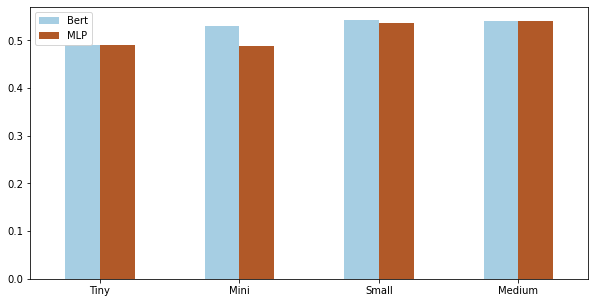

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bert = [0.48975,  0.529375, 0.54285,  0.53985]
mlp = [0.491,0.4887,0.5367,0.54115]
index=['Tiny','Mini','Small','Medium']
 
# plot
df = pd.DataFrame({'Bert': bert,'MLP': mlp}, index=index)
df.plot.bar(rot=0, colormap='Paired',figsize = (10, 5))
plt.savefig('graph.png')

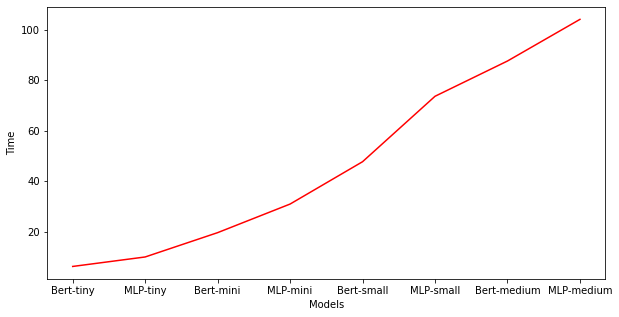

In [5]:
data = [['Bert-tiny', 0.48975,6.2737],
        ['MLP-tiny', 0.491, 10.0225 ],
        ['Bert-mini', 0.529375,19.6437], 
        ['MLP-mini', 0.4887, 30.9587 ],
        ['Bert-small', 0.54285,47.7087], 
        ['MLP-small', 0.5367, 73.59625 ],
        ['Bert-medium', 0.53985,  87.55],
        ['MLP-medium', 0.54115, 104.0275 ]
        ]

df = pd.DataFrame(data, columns=['Model', 'Test accuracy','Time'])

#plot
fig = plt.figure(figsize = (10, 5))
plt.plot(df['Model'], df['Time'], color='r')
plt.xlabel("Models")
plt.ylabel("Time")
plt.savefig('graph_time.png')
plt.show()

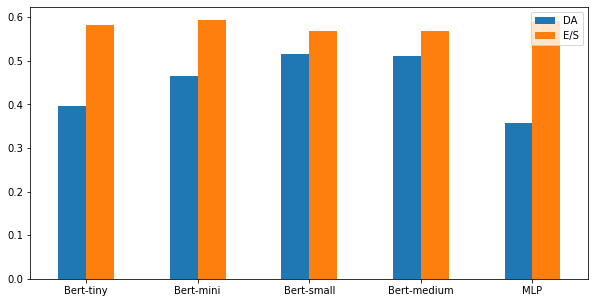

In [20]:
DA = [0.3975, 0.464925, 0.51615, 0.512175,0.3583]
ES = [0.582, 0.593825, 0.56955, 0.567525,0.5906]
index = ['Bert-tiny', 'Bert-mini', 'Bert-small','Bert-medium','MLP']

df = pd.DataFrame({'DA': DA,'E/S': ES}, index=index)
df.plot.bar(rot=0, figsize = (10, 5))

plt.savefig('comparison.png')